In [2]:
%matplotlib inline

# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

pd.options.display.float_format = '{:,.2f}'.format

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

In [3]:
CRUDP = pd.read_excel('CRUDP.xlsx', skiprows=[0, 1, 2, 3, 4, 5], index_col='Dates', parse_dates=True)[['PX_LAST']]
CRUDP.columns=['CRUDP']

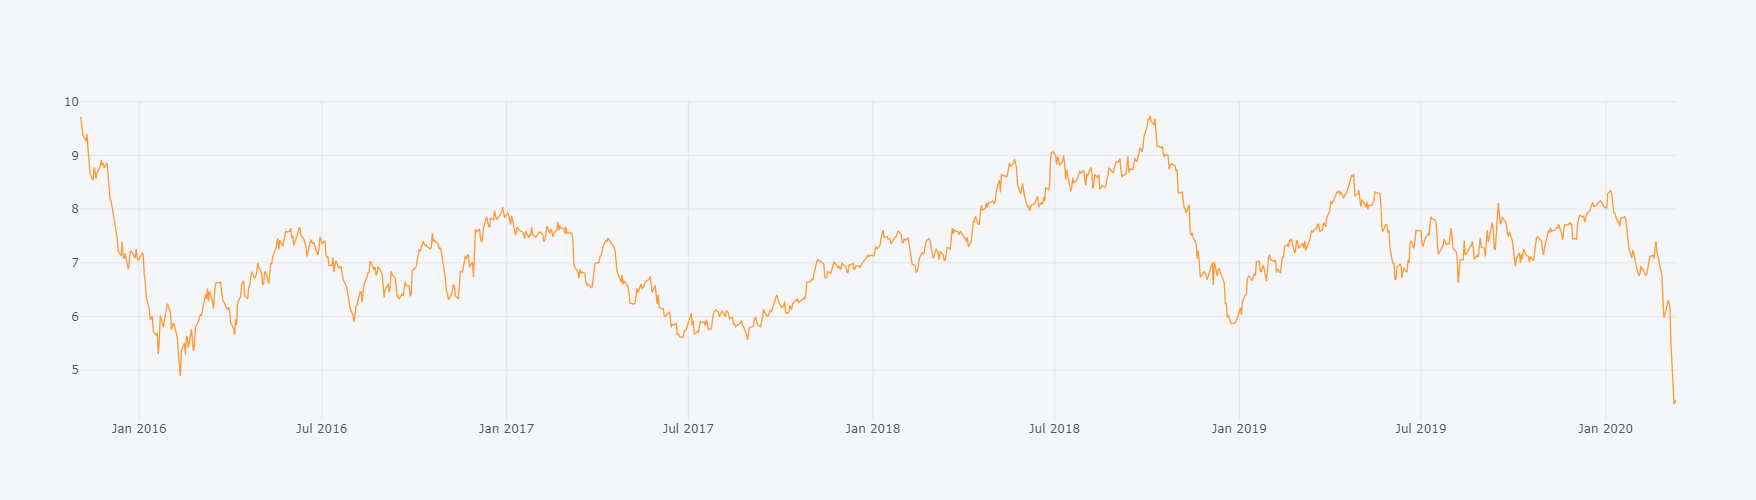

In [4]:
dimensions=(990, 500)
CRUDP.iplot(dimensions=dimensions)

In [5]:
import quandl 

OIL = quandl.get("OPEC/ORB", authtoken="HU7i-qDWTo-fWcBzRZ_f")
OIL.columns=['Oil']

EUR_USD = quandl.get("ECB/EURUSD", authtoken="HU7i-qDWTo-fWcBzRZ_f")
EUR_USD.columns=['EUR/USD']

In [6]:
Fundos = CRUDP.merge(OIL, left_index = True, right_index = True, how='inner')
Fundos = Fundos.merge(EUR_USD, left_index = True, right_index = True, how='inner')

In [7]:
Fundos['Oil_eur'] = Fundos['Oil'] / Fundos['EUR/USD']

In [8]:
Fundos = Fundos[['CRUDP', 'Oil_eur']]

In [9]:
Fundos = Fundos/Fundos.iloc[0]

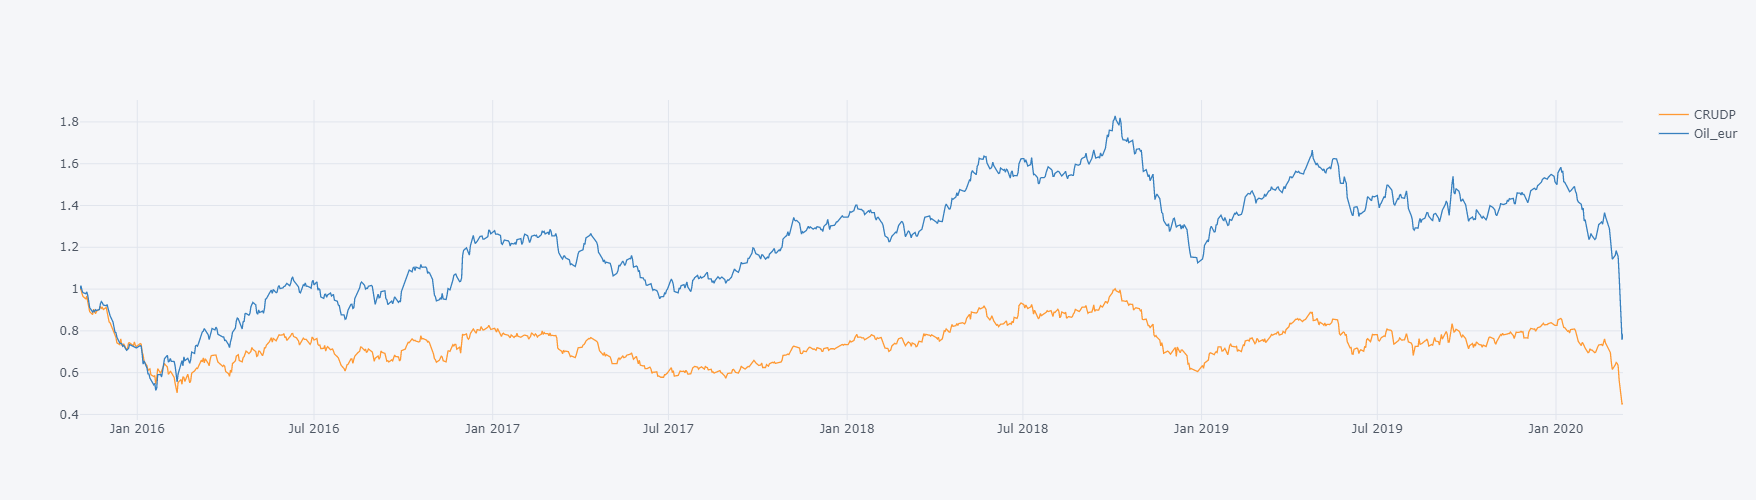

In [10]:
Fundos.iplot(dimensions=dimensions)

In [11]:
fundos_normv= Fundos.copy()

# Resampling to yearly (business year)
yearly_quotes_fundos = fundos_norm.resample('BA').last()

# Adding first quote (only if start is in the middle of the year) ### Falta trabalho para automatizar #####
yearly_quotes_fundos = pd.concat([fundos_norm.iloc[:1], yearly_quotes_fundos])

# Returns
yearly_returns_fundos = ((yearly_quotes_fundos / yearly_quotes_fundos.shift(1)) - 1) * 100
yearly_returns_fundos = yearly_returns_fundos.set_index([list(range(fundos_norm.index[0].year - 1, fundos_norm.index[-1].year + 1))]).drop(fundos_norm.index[0].year - 1)

# Inverter o sentido das rows no dataframe ####
yearly_returns_fundos = yearly_returns_fundos / 100 # A alterar para incluir 2001

# Sns heatmap
fig, ax = plt.subplots()
fig.set_size_inches(10, 3.5)

ax = sns.heatmap(yearly_returns_fundos.transpose(), annot=True, cmap="RdYlGn", linewidths=.2, cbar=False, center=0, fmt='.2%', vmax=0.25)
plt.yticks(rotation=360)
plt.title('Performance anual por fundo');

NameError: name 'fundos_norm' is not defined

In [ ]:
Fundos_2017 = Fundos['2018':]
Fundos_2017 = Fundos_2017/Fundos_2017.iloc[0]

In [ ]:
Fundos_2017.iplot(dimensions=dimensions)

In [12]:
# Downloading funds and creating quotes and returns dataframes
Begin = '2000-03-10'
# End = '2017-08-20' # Só activas se quiseres que acabe num dia especifíco 

Tickers = ['IUSA.XETRA', 'SPY.US'] # Novos: EPRA.PA, IBCQ.XETRA, IUSN.XETRA, AGGH.LSE, HYLA.LSE

ETFs = pd.DataFrame()

# Download
for ticker in Tickers:
    url = "https://eodhistoricaldata.com/api/eod/" + str(ticker) + "?api_token=5c982bff80deb2.22427269&period=d."
    ETF = pd.read_csv(url, index_col = 'Date', parse_dates = True)[['Adjusted_close']].iloc[:-1, :]
    ETFs = ETFs.merge(ETF, left_index = True, right_index = True, how='outer')
    
ETFs.columns = Tickers
ETFs = ETFs.fillna(method='ffill')
ETFs = ETFs.replace(to_replace=0, method='ffill')

ETFs = ETFs.loc['2019-12-31':]

In [16]:
ETFs = (ETFs / ETFs.iloc[0]) * 100

In [17]:
ETFs

,IUSA.XETRA,SPY.US
Date,,
2019-12-31,100.00,100.00
2020-01-02,100.01,100.94
2020-01-03,100.12,100.17
2020-01-06,99.93,100.55
2020-01-07,100.60,100.27
2020-01-08,101.07,100.80
2020-01-09,101.91,101.49
2020-01-10,101.86,101.20
2020-01-13,101.71,101.89


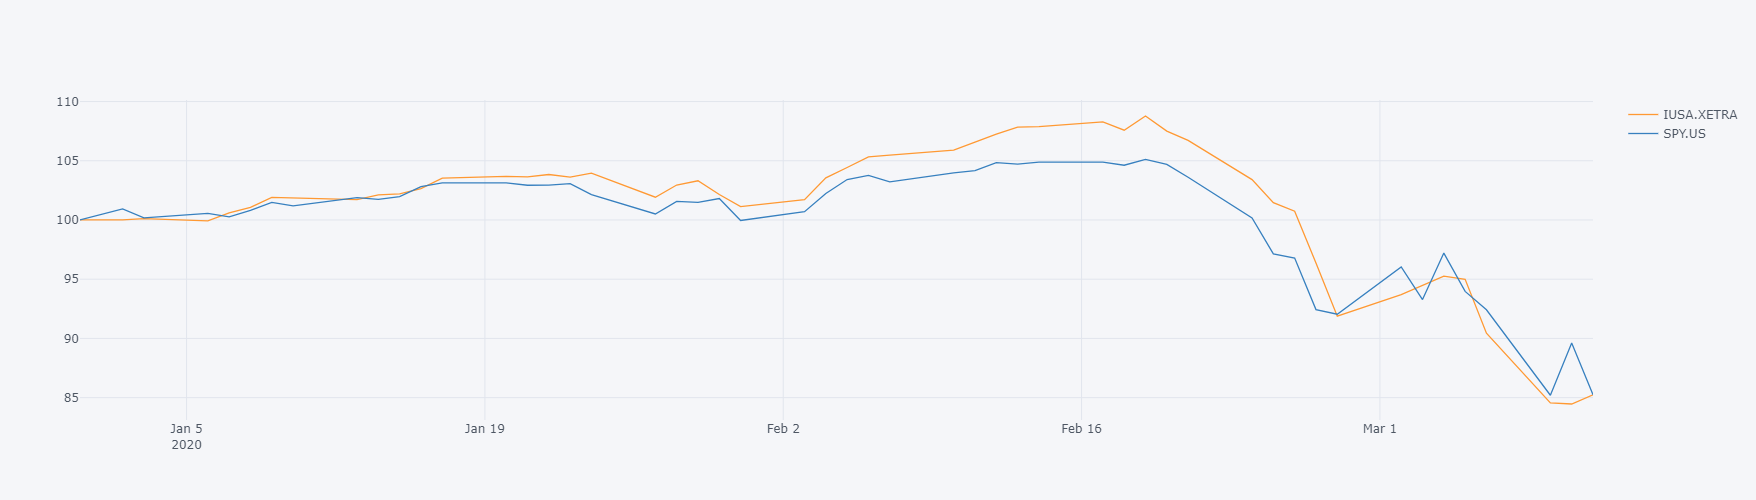

In [18]:
ETFs.iplot(dimensions=dimensions)

In [19]:
# Downloading funds and creating quotes and returns dataframes
Begin = '2000-03-10'
# End = '2017-08-20' # Só activas se quiseres que acabe num dia especifíco 

Tickers = ['VIX.INDX'] # Novos: EPRA.PA, IBCQ.XETRA, IUSN.XETRA, AGGH.LSE, HYLA.LSE

ETFs = pd.DataFrame()

# Download
for ticker in Tickers:
    url = "https://eodhistoricaldata.com/api/eod/" + str(ticker) + "?api_token=5c982bff80deb2.22427269&period=d."
    ETF = pd.read_csv(url, index_col = 'Date', parse_dates = True)[['Adjusted_close']].iloc[:-1, :]
    ETFs = ETFs.merge(ETF, left_index = True, right_index = True, how='outer')
    
ETFs.columns = Tickers
ETFs = ETFs.fillna(method='ffill')
ETFs = ETFs.replace(to_replace=0, method='ffill')

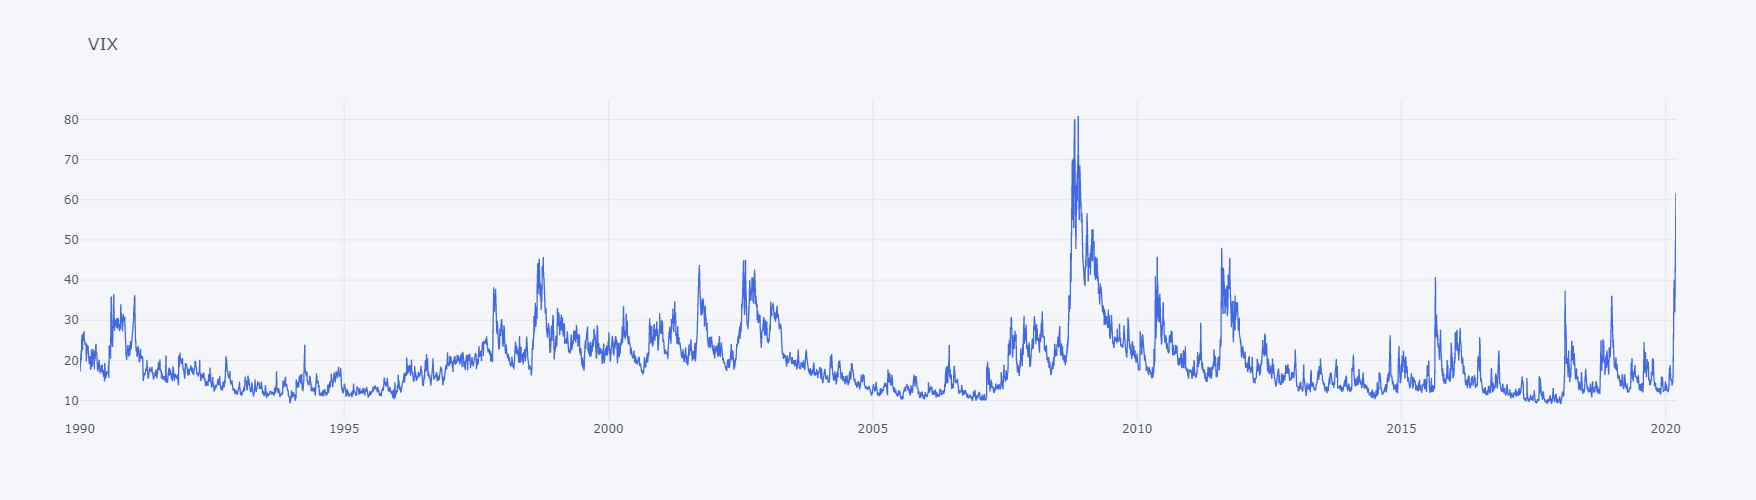

In [23]:
ETFs.iplot(dimensions=dimensions, color='royalblue', title='VIX')